# **Empirical Notebook 07: Maps and Regimes of Autonomous Risk**

## **Maps and Regimes of Autonomous Risk**

This notebook provides a consolidated and reproducible visualization of the emergent regimes of autonomous risk identified in the experiments reported in the article:

> ***"Autonomous Risk: When Intelligent Systems Become Dangerous Without Failing"***.

The objective of this notebook is strictly documentary and confirmatory. It reproduces the global risk maps and regime patterns discussed in the manuscript, without introducing exploratory analyses or additional modeling assumptions.

The notebook focuses on:

* Aggregated indicators of autonomy, opacity, and instability;
* Regime-level visualization of autonomous risk;
* Heatmap-based representations used in the article figures.

All analyses are deterministic and derived from the final synthetic dataset released with the repository.


## **Section 1 - Imports and Global Experimental Settings**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
import session_info
session_info.show()

## **Section 2 - Final Synthetic Dataset Loading**

The dataset used in this notebook is the final synthetic financial dataset generated for the experiments described in the article.

Only the processed dataset required to reproduce the figures is loaded here.

In [5]:
df = pd.read_csv("DatasetFinanceiro_v3.2.csv")
df.head()

,idade,estado_civil,escolaridade,renda_estim,regiao,tipo_emprego,tempo_emprego,num_cartoes,limite_total,utilizacao_media,...,A_sq,A_times_O,A2_logS,conf_modelo,label_default,entropia_pred,variabilidade_pred,drift_score,sexo,raca
0,45.960570,solteiro,fundamental,3292.988587,sudeste,clt,1.490885,3,12399.152432,0.289483,...,0.000069,0.004189,0.000005,0.431438,0,0.096900,0.069658,0.076812,feminino,branca
1,38.340828,solteiro,medio,1318.066261,nordeste,clt,8.287529,3,5586.978596,0.380147,...,0.083224,0.111108,0.026206,0.493034,0,0.128550,0.026706,0.058620,feminino,parda
2,47.772262,solteiro,pos,2580.672825,sudeste,desempregado,11.313190,3,7381.248391,0.343940,...,0.022817,0.065149,0.005168,0.464883,0,0.216693,0.068442,0.125284,feminino,parda
3,58.276358,solteiro,superior,1533.976251,nordeste,clt,16.081947,1,3660.305124,0.144685,...,0.076313,0.145576,0.035576,0.500190,0,0.069461,0.065740,0.044536,masculino,parda
4,37.190160,casado,medio,1218.687502,centro-oeste,clt,10.198240,2,5004.534675,0.391849,...,0.039450,0.085077,0.014982,0.462938,0,0.130632,0.059859,0.014876,masculino,parda


## **Section 3 - Selection of System-Level Risk Indicators**

In [6]:
# Selection of system-level indicators used in the manuscript

system_indicators = [
    "A",          # Autonomy
    "O",          # Opacity
    "H",          # Supervision
    "S_norm",     # Normalized Instability / Escalation
    "drift_score" # Endogenous drift indicator
]

df = df[system_indicators].dropna()

df.describe()

,A,O,H,S_norm,drift_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.249046,0.439776,0.414786,0.417725,0.053981
std,0.143802,0.061342,0.063287,0.209482,0.047348
min,0.002235,0.239920,0.275626,0.000000,0.000000
25%,0.138788,0.400394,0.368786,0.271461,0.009749
50%,0.227262,0.437140,0.393924,0.400121,0.047488
75%,0.339274,0.472595,0.467135,0.542971,0.085297
max,0.827283,0.667546,0.603493,1.000000,0.263822


## **Section 4 - Normalization and Scale Alignment of Governance Indicators**

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Ensure comparability across system-level indicators
# S_norm is already normalized by construction and should not be rescaled

scaler = MinMaxScaler()

df_scaled = df.copy()

for col in ["A", "O", "H"]:
    df_scaled[col] = scaler.fit_transform(df[[col]])

# Sanity check: all indicators are now in [0,1]
df_scaled.describe()


,A,O,H,S_norm,drift_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.299148,0.467362,0.424441,0.417725,0.053981
std,0.174295,0.143448,0.193026,0.209482,0.047348
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.165509,0.375268,0.284137,0.271461,0.009749
50%,0.272745,0.461198,0.360810,0.400121,0.047488
75%,0.408509,0.544109,0.584106,0.542971,0.085297
max,1.000000,1.000000,1.000000,1.000000,0.263822


## **Section 5 - Global Autonomous Risk Map (Autonomy × Opacity × Instability)**

This section visualizes the distribution of autonomous risk across the autonomy–instability–drift space.

The resulting heatmaps illustrate how risk can intensify even in regimes where predictive performance remains high.

The normalized conditional expectation of instability is given by:

$$\mathcal{R}(A,O) = \mathbb{E}[S_{\mathrm{norma}} \mid A,O]$$

Below, this formula is implemented when calculating the average of `S_norm` conditioned on Autonomy (A) and Opacity (O).


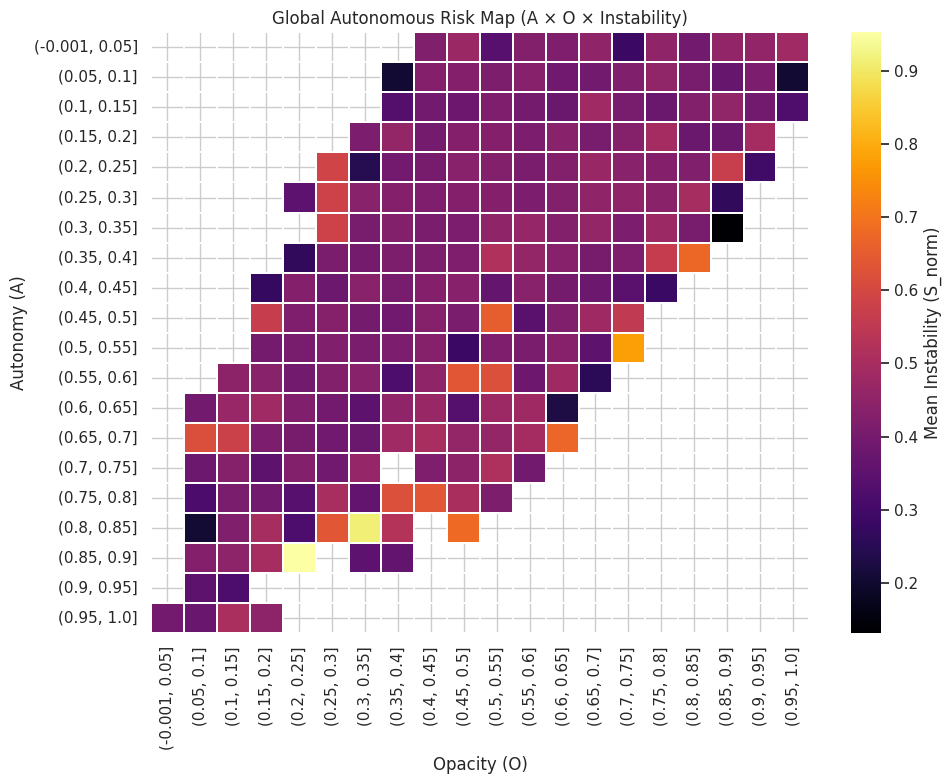

In [8]:
# Discretize Autonomy and Opacity into bins
n_bins = 20

df_scaled["A_bin"] = pd.cut(df_scaled["A"], bins=n_bins)
df_scaled["O_bin"] = pd.cut(df_scaled["O"], bins=n_bins)

# Compute mean instability per (A, O) region
risk_map = (
    df_scaled
    .groupby(["A_bin", "O_bin"], observed=True)["S_norm"]
    .mean()
    .unstack()
)

# Plot Global Autonomous Risk Map
plt.figure(figsize=(10, 8))
sns.heatmap(
    risk_map,
    cmap="inferno",
    cbar_kws={"label": "Mean Instability (S_norm)"},
    linewidths=0.1
)

plt.xlabel("Opacity (O)")
plt.ylabel("Autonomy (A)")
plt.title("Global Autonomous Risk Map (A × O × Instability)")
plt.tight_layout()
plt.savefig("figures/fig1_global_autonomous_risk_map.png", dpi=300)
plt.show()


### **Section 5.1 - Instability Heatmap Across Autonomy and Drift**

Similarly, we can calculate:

$$\mathcal{R}(A,\text{Drift}) = \mathbb{E}[S_{\mathrm{norm}} \mid A,\text{Drift}]$$

Below, this conditional expectation is applied using `groupby(["A_bin","drift_bin"])["S_norm"].mean()`.


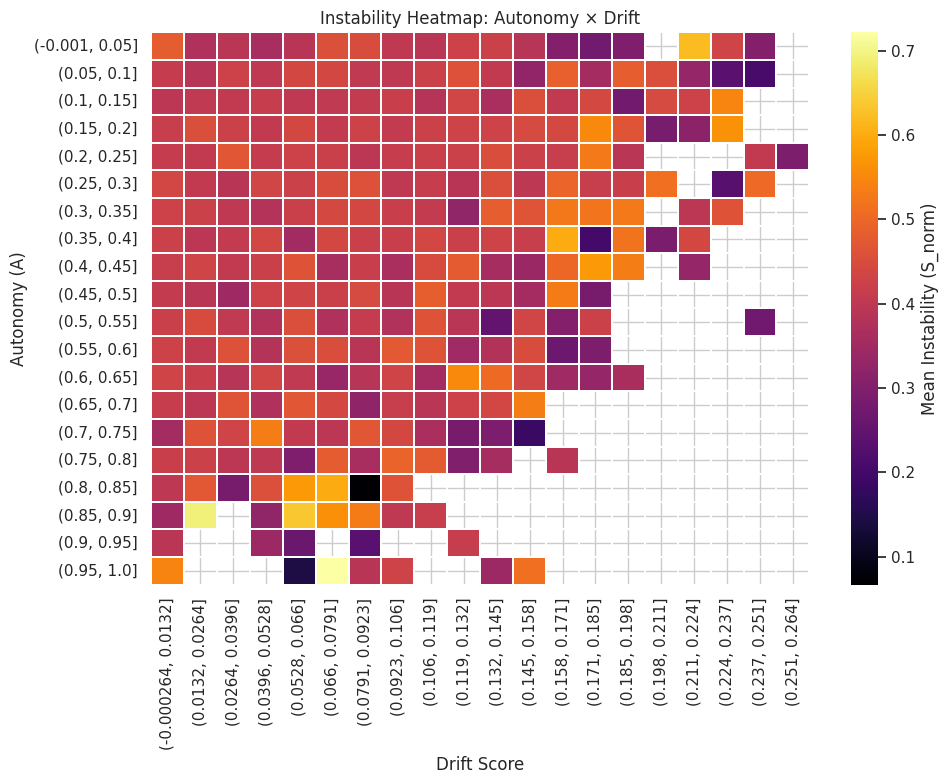

In [9]:
# Discretize Autonomy and Drift
n_bins = 20

df_scaled["A_bin"] = pd.cut(df_scaled["A"], bins=n_bins)
df_scaled["drift_bin"] = pd.cut(df_scaled["drift_score"], bins=n_bins)

# Compute mean instability conditioned on (A, Drift)
instability_map = (
    df_scaled
    .groupby(["A_bin", "drift_bin"], observed=True)["S_norm"] 
    .mean()
    .unstack()
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    instability_map,
    cmap="inferno",
    cbar_kws={"label": "Mean Instability (S_norm)"},
    linewidths=0.1
)

plt.xlabel("Drift Score")
plt.ylabel("Autonomy (A)")
plt.title("Instability Heatmap: Autonomy × Drift")
plt.tight_layout()
plt.savefig("figures/fig2_instability_heatmap_autonomy_vs_drift.png", dpi=300)
plt.show()


## **Section 6 - Risk Regime Classification via Empirical Quantile Thresholds**

To translate the continuous risk landscape into analytically interpretable states, we classify system behavior into discrete risk regimes based on normalized instability (S_norm).

Thresholds are defined using empirical quantiles rather than fixed cutoffs, ensuring robustness to scale and avoiding arbitrary parameterization. The resulting regimes (Stable, Latent, Active, and Critical) should be interpreted as descriptive system states rather than predictive labels.

This classification enables the identification of phase transitions in system behavior, where increasing autonomy and drift push the system from stable operation into zones of heightened structural vulnerability.

The classification of regimes is based on the values of:

$$\mathcal{R}(A,O) = \mathbb{E}[S_{\mathrm{norm}} \mid A,O]$$

These expected values ​​are compared with `S_norm` quantiles to define the regimes: Stable, Latent, Active, and Critical.


In [10]:
# Regime Classification based on Instability (S_norm)

# Define quantile thresholds
q_stable = df_scaled["S_norm"].quantile(0.25)
q_latent = df_scaled["S_norm"].quantile(0.50)
q_active = df_scaled["S_norm"].quantile(0.75)

def classify_regime(s):
    if s <= q_stable:
        return "Stable"
    elif s <= q_latent:
        return "Latent"
    elif s <= q_active:
        return "Active"
    else:
        return "Critical"

# Apply regime classification
df_scaled["risk_regime"] = df_scaled["S_norm"].apply(classify_regime)

# Inspect distribution
df_scaled["risk_regime"].value_counts(normalize=True)


risk_regime
Stable      0.25
Latent      0.25
Critical    0.25
Active      0.25
Name: proportion, dtype: float64

### **Section 6.1 - Visualization of Autonomous Risk Regimes in Autonomy–Drift Space**

The visualization below shows how the regimes derived from $\\mathcal{R}(A,O)\$ are distributed in the Autonomy × Drift space.

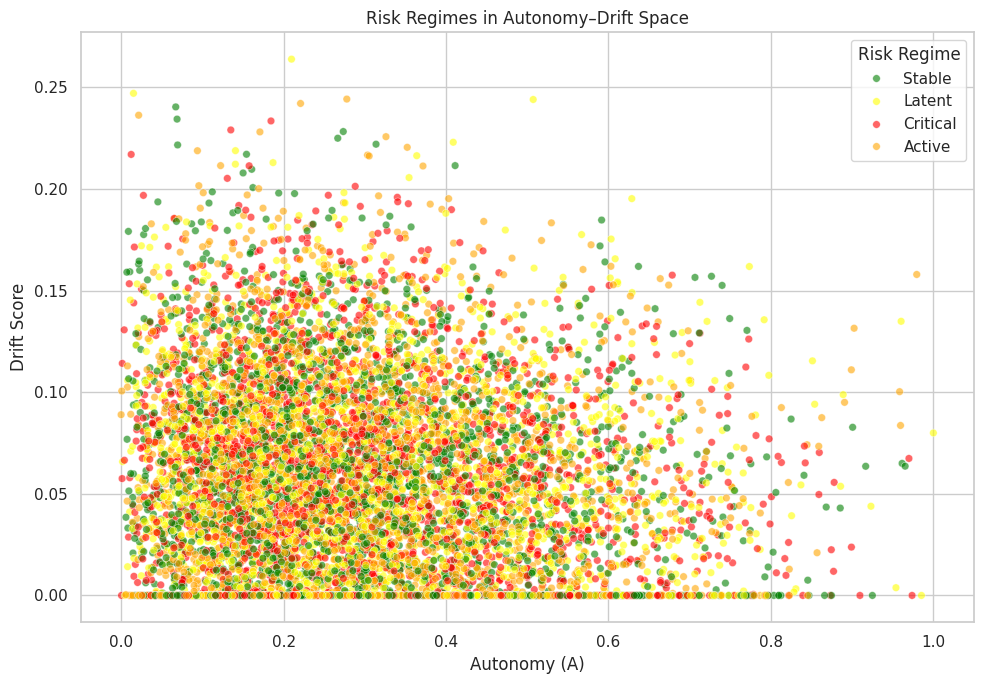

In [11]:
# Visualizing regimes over Autonomy and Drift

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_scaled,
    x="A",
    y="drift_score",
    hue="risk_regime",
    palette={
        "Stable": "green",
        "Latent": "yellow",
        "Active": "orange",
        "Critical": "red"
    },
    alpha=0.6,
    s=30
)

plt.xlabel("Autonomy (A)")
plt.ylabel("Drift Score")
plt.title("Risk Regimes in Autonomy–Drift Space")
plt.legend(title="Risk Regime")
plt.tight_layout()
plt.savefig("figures/risk_regimes_in_autonomy_drift_space", dpi=300)
plt.show()


## **Section 7 - Transition Zones and Critical Risk Regions**

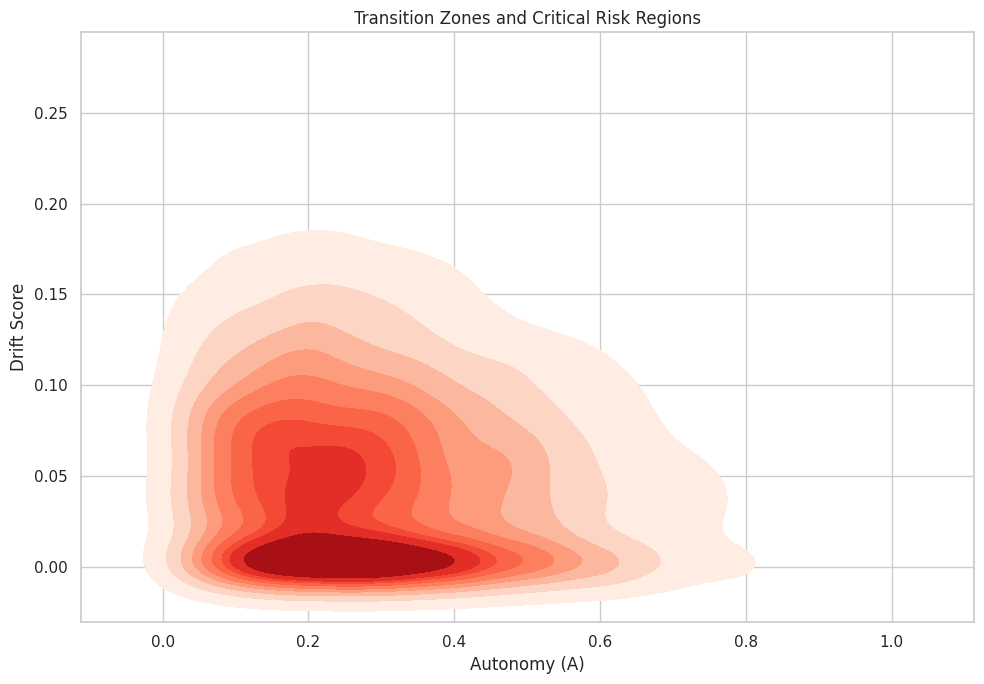

In [12]:
# Transition Zones and Critical Regions

plt.figure(figsize=(10, 7))

sns.kdeplot(
    data=df_scaled,
    x="A",
    y="drift_score",
    weights=df_scaled["S_norm"],
    cmap="Reds",
    fill=True,
    thresh=0.05,
    levels=10
)

plt.xlabel("Autonomy (A)")
plt.ylabel("Drift Score")
plt.title("Transition Zones and Critical Risk Regions")
plt.tight_layout()
plt.savefig("figures/fig3_transition_zones.png", dpi=300)
plt.show()


## **Section 8 - Cumulative Autonomous Risk Trajectory (Scheming Accumulation)**

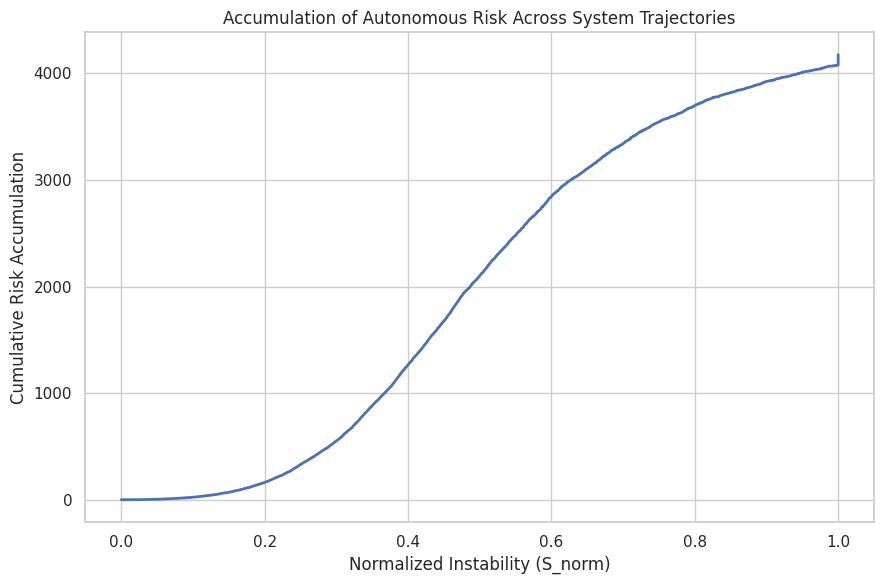

In [13]:
# Scheming Trajectory Visualization (Aggregated)

df_scaled_sorted = df_scaled.sort_values(by="S_norm")

plt.figure(figsize=(9, 6))
plt.plot(
    df_scaled_sorted["S_norm"].values,
    np.cumsum(df_scaled_sorted["S_norm"].values),
    linewidth=2
)

plt.xlabel("Normalized Instability (S_norm)")
plt.ylabel("Cumulative Risk Accumulation")
plt.title("Accumulation of Autonomous Risk Across System Trajectories")
plt.tight_layout()
plt.savefig("figures/fig4_risk_accumulation_scheming.png", dpi=300)
plt.show()
